# Sentiment Analysis on Amazon Unlocked Mobile Phones Using NLTK

In [388]:
#Importing libraries
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import nltk

Importing data from disk
##### link: https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones/data

In [390]:
data_file = 'C:\\Users\\SONY\\Downloads\\Amazon_Unlocked_Mobile.csv'
#reading csv file
data = pd.read_csv( data_file)

In [391]:
data.head() 

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [392]:
product_name = []
for item in data["Product Name"]:
    if (item in product_name):
        continue
    else:
        product_name.append(item)
        

In [393]:
len(product_name) # 4410 phones

4410

### There are 4410 phone models in this data set.

In [394]:
data["Brand Name"]
brands = []
for item in data["Brand Name"]:
    if (item in brands):
        continue
    else:
        brands.append(item)

In [395]:
len(brands) 

385

### There are 385 brands in this data set.

Putting the data in a Pandas Dataframe.

In [396]:
data_df = pd.DataFrame(data) #converting the data into a pandas dataframe.

In [397]:
data_df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [398]:
data_df = shuffle(data_df) #Shuffle Data 

In [141]:
data_df[:10]

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
131404,BLU PURE XL Smartphone - 4G LTE GSM Unlocked -...,BLU,134.95,4,"So, here's why I gave this product 1 less star...",2.0
315184,Samsung Galaxy Grand Prime G531H/DS Internatio...,Samsung,189.90,5,It good,0.0
25344,Apple iPhone 5c 16GB (White) - Sprint,Apple,368.45,1,This Sprint iPhone 5c works great when it has ...,0.0
64897,Apple iPhone 6s 128 GB International Warranty ...,"Amazon.com, LLC *** KEEP PORules ACTIVE ***",699.95,5,Great price and fast shipping. I was very happ...,5.0
55815,Apple iPhone 6 Plus 128GB Factory Unlocked GSM...,NaN,648.00,1,"Not the Iphone 6 Plus, it is great, but, do no...",2.0
2811,ALCATEL OneTouch Idol 3 Global Unlocked 4G LTE...,Alcatel,129.00,5,This thing is awesome. The battery life is gre...,3.0
114365,BLU Dash JR W D141w Unlocked GSM Dual-SIM Andr...,BLU,34.99,3,"Phone looks good, but could not get it to go o...",0.0
190946,HTC Inspire 4G A9192 Unlocked GSM Android Smar...,HTC,54.18,4,I really like my phone!!! The battery doesn't ...,0.0
56748,Apple iPhone 6 Plus 16GB Factory Unlocked GSM ...,NaN,399.97,5,Love,0.0
19210,Apple iPhone 5 16GB (White) - T-Mobile,Apple,136.99,5,Customer service was great. The phone was new ...,NaN


#### Cleaning data by removing rows having 'null' values.

In [142]:
#dropped rows having NaN values
data_df = data_df.dropna()

In [399]:
# General Description of data_df
data_df.describe() 

,Price,Rating,Review Votes
count,407907.000000,413840.000000,401544.000000
mean,226.867155,3.819578,1.507237
std,273.006259,1.548216,9.163853
min,1.730000,1.000000,0.000000
25%,79.990000,3.000000,0.000000
50%,144.710000,5.000000,0.000000
75%,269.990000,5.000000,1.000000
max,2598.000000,5.000000,645.000000


### Top 10 brands in the data set sorted on the basis of sum of Ratings.

In [401]:
info = pd.pivot_table(data_df,index=['Brand Name'],values=['Rating', 'Review Votes'],
               columns=[],aggfunc=[np.sum, np.mean],fill_value=0)
info = info.sort_values(by=('sum', 'Rating'), ascending = False)

info.head(10)


sum                   mean             
            Rating Review Votes    Rating Review Votes
Brand Name                                            
Samsung     260513        97903  3.962356     1.530069
BLU         239853        58430  3.792262     0.952792
Apple       228346       112280  3.924415     1.998149
LG           86114        23070  3.841460     1.061178
Nokia        64187        25964  3.819291     1.600148
BlackBerry   63126        21114  3.741465     1.279326
Motorola     51157        23107  3.812849     1.777051
HTC          44094        12803  3.465420     1.035506
CNPGD        39176        20151  3.106002     1.638026
OtterBox     35022         2276  4.383778     0.288759

### CoRelation between price & rating 

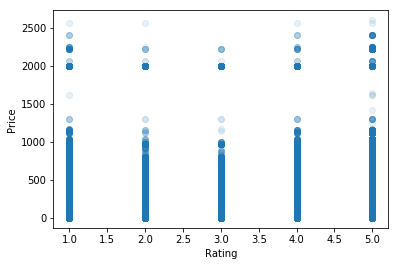

In [402]:
import matplotlib.pyplot as plt
ylabel = data_df["Price"]
plt.ylabel("Price")
plt.xlabel("Rating")
xlabel = data_df["Rating"]
plt.scatter(xlabel, ylabel, alpha=0.1)
plt.show()

### CoRelation between Price and Review Votes

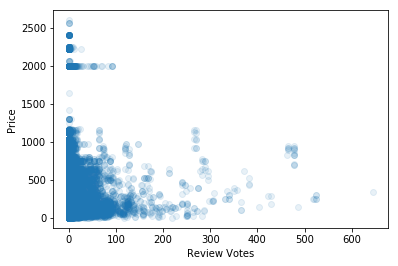

In [147]:
ylabel2 = data_df["Price"]
plt.ylabel("Price")
xlabel2 = data_df["Review Votes"]
plt.xlabel("Review Votes")
plt.scatter(xlabel2, ylabel2, alpha=0.1)
plt.show()

#### Strong co-relation between review votes and price.

### CoRelation between Rating and Review Votes

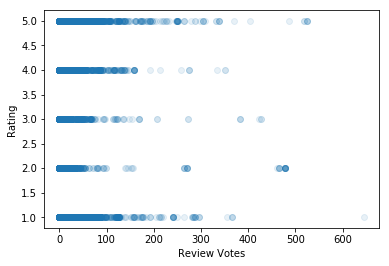

In [148]:
ylabel3 = data_df["Rating"]
plt.ylabel("Rating")
xlabel3 = data_df["Review Votes"]
plt.xlabel("Review Votes")
plt.scatter(xlabel3, ylabel3, alpha=0.1)
plt.show()

In [149]:
corr_matrix = data_df.corr()
corr_matrix["Rating"].sort_values(ascending = False)

Rating          1.000000
Price           0.073948
Review Votes   -0.046526
Name: Rating, dtype: float64

#### It is observed that Rating has a NEGATIVE CORRELATION with Review Votes = -0.046526

In [150]:
corr_matrix = data_df.corr()
corr_matrix["Price"].sort_values(ascending = False)

Price           1.000000
Rating          0.073948
Review Votes    0.022164
Name: Price, dtype: float64

#### It is observed that Rating has a POSITIVE CORRELATION with Price = 0.073948

In [151]:
all_reviews = data_df["Reviews"]
all_reviews.head()

131404    So, here's why I gave this product 1 less star...
315184                                              It good
25344     This Sprint iPhone 5c works great when it has ...
64897     Great price and fast shipping. I was very happ...
2811      This thing is awesome. The battery life is gre...
Name: Reviews, dtype: object

#### Reset index (post-shuffling)

In [403]:
#reset_index
data_df = data_df.reset_index(drop=True)

In [404]:
data_df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,Blackberry Curve 8520 Gemini SmartPhone Unlock...,BlackBerry,39.99,5,"Very nice phone: unlocked, delivery shipping O...",73.0
1,Samsung Galaxy S4 Mini L520 16GB Sprint CDMA 4...,Samsung,89.99,5,love it,0.0
2,Samsung Galaxy S3 SGH-i747 4G LTE GSM Unlocked...,Samsung,88.00,4,"hi, i bought my galaxy iii in January from the...",0.0
3,Apple iPhone 5s 32GB (Gold) - AT&T,Apple,54.34,1,I bought it as new but when i get it today and...,1.0
4,BLU Energy X Plus Smartphone - With 4000 mAh S...,BLU,139.00,5,In love with my phonee!! Exelent!,0.0


### NLTK function to find sentiment value and sentiment.

In [155]:
all_reviews = data_df['Reviews']
all_sent_values = []
all_sentiments = []


In [739]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def sentiment_value(paragraph):
    analyser = SentimentIntensityAnalyzer()
    result = analyser.polarity_scores(paragraph)
    score = result['compound']
    return round(score,1)

In [743]:
sample = data_df['Reviews'][1231]
print(sample)
print('Sentiment: ')
print(sentiment_value(sample))

Great phone with good battery life! It has served me well so far.
Sentiment: 
0.9


In [750]:
sample1 = data_df['Reviews'][99314]
print(sample1)
print('Sentiment: ')
print(sentiment_value(sample1))

This is a really good phone for the price, there is lag here and there . the sound quality isn't all the great honestly,the bass is a too choppy and the volume doesn't go up to its full potential, the back camera is good, but the front camera is just terrible, if the sound and camera were great , this phone would probably be getting a 5 star.
Sentiment: 
-0.8


In [755]:
sample2 = data_df['Reviews'][9001]
print(sample2)
print('Sentiment: ')
print(sentiment_value(sample2))

I got two of these phones. One for me and one for my wife. My wife had problems from the start. Her phone didn't get good reception, but mine did.It was hard to find accessories for this phone.My daughter is teething and she got hold of the phone and slobbered on it. The phone immediately started acting up. The microphone stopped working, the top three buttons no longer work, lights stay lit when they aren't supposed to.I sent it in to Ericssons to have it repaired and it was returned to me unrepaired because the water damage voided the warranty.I've always had motorolas in the past. This is the first ericssons. I'll never get an ericssons again.
Sentiment: 
-0.9


#### Problem: Calling the function for full set of reviews ie: for 400,000+ , takes time. (8 minutes for 20000 rows in my system.)

In [406]:
for i in range(0,20000):
    all_sent_values.append(sentiment_value(all_reviews[i])) # 8 minutes for calculation 

In [158]:
len(all_sent_values)

20000

In [408]:
#Sentiment Analysis on first 20,000 rows
temp_data = data_df[0:20000]

In [409]:
temp_data.shape

(20000, 6)

### Intervals
#### [ -1, -0.5) : 1, V.Negative
#### [-0.5, 0) : 2, Negative
#### [0] : 3, Neutral
#### (0, 0.5) : 4, Positive
#### [0.5, 1] : 5, V.Positive


In [410]:
SENTIMENT_VALUE = []
SENTIMENT = []
for i in range(0,20000):
    sent = all_sent_values[i]
    if (sent<=1 and sent>=0.5):
        SENTIMENT.append('V.Positive')
        SENTIMENT_VALUE.append(5)
    elif (sent<0.5 and sent>0):
        SENTIMENT.append('Positive')
        SENTIMENT_VALUE.append(4)
    elif (sent==0):
        SENTIMENT.append('Neutral')
        SENTIMENT_VALUE.append(3)
    elif (sent<0 and sent>=-0.5):
        SENTIMENT.append('Negative')
        SENTIMENT_VALUE.append(2)
    else:
        SENTIMENT.append('V.Negative')
        SENTIMENT_VALUE.append(1)
        
        

In [411]:
#update to temp_data

In [412]:
temp_data['SENTIMENT_VALUE'] = SENTIMENT_VALUE
temp_data['SENTIMENT'] = SENTIMENT

C:\Users\SONY\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\SONY\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [413]:
temp_data.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,SENTIMENT_VALUE,SENTIMENT
0,Blackberry Curve 8520 Gemini SmartPhone Unlock...,BlackBerry,39.99,5,"Very nice phone: unlocked, delivery shipping O...",73.0,5,V.Positive
1,Samsung Galaxy S4 Mini L520 16GB Sprint CDMA 4...,Samsung,89.99,5,love it,0.0,4,Positive
2,Samsung Galaxy S3 SGH-i747 4G LTE GSM Unlocked...,Samsung,88.00,4,"hi, i bought my galaxy iii in January from the...",0.0,5,V.Positive
3,Apple iPhone 5s 32GB (Gold) - AT&T,Apple,54.34,1,I bought it as new but when i get it today and...,1.0,5,V.Positive
4,BLU Energy X Plus Smartphone - With 4000 mAh S...,BLU,139.00,5,In love with my phonee!! Exelent!,0.0,5,V.Positive


##### Accuracy

In [187]:
#find accuracy
counter = 0
for i in range(0,20000):
    if (abs(temp_data['Rating'][i]-temp_data['SENTIMENT_VALUE'][i])>1):
        counter += 1
    

In [188]:
counter

4570

###### 4570 occurences where Rating and Sentiment differ by more than 1.

In [189]:
accuracy = (temp_data.shape[0]-counter)/temp_data.shape[0]

In [414]:
percent_accuracy = accuracy*100

In [415]:
percent_accuracy

77.14999999999999

### 77.15 % equal values of Rating and Sentiment Values (+/- 1) 

In [416]:
temp_data.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,SENTIMENT_VALUE,SENTIMENT
0,Blackberry Curve 8520 Gemini SmartPhone Unlock...,BlackBerry,39.99,5,"Very nice phone: unlocked, delivery shipping O...",73.0,5,V.Positive
1,Samsung Galaxy S4 Mini L520 16GB Sprint CDMA 4...,Samsung,89.99,5,love it,0.0,4,Positive
2,Samsung Galaxy S3 SGH-i747 4G LTE GSM Unlocked...,Samsung,88.00,4,"hi, i bought my galaxy iii in January from the...",0.0,5,V.Positive
3,Apple iPhone 5s 32GB (Gold) - AT&T,Apple,54.34,1,I bought it as new but when i get it today and...,1.0,5,V.Positive
4,BLU Energy X Plus Smartphone - With 4000 mAh S...,BLU,139.00,5,In love with my phonee!! Exelent!,0.0,5,V.Positive


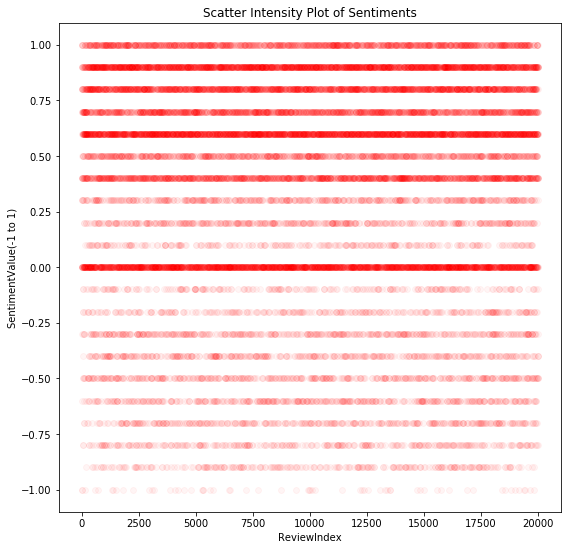

In [451]:
xaxis = []
for i in range(0,20000):
    xaxis.append(i)

ylabel_new_1 = all_sent_values[:20000]

xlabel = xaxis
plt.figure(figsize=(9,9))
plt.xlabel('ReviewIndex')
plt.ylabel('SentimentValue(-1 to 1)')
plt.plot(xlabel, ylabel_new_1, 'ro',  alpha=0.04)

plt.title('Scatter Intensity Plot of Sentiments')
plt.show()

### Observation: Sentiment variation is concentrated towards positivity.

In [733]:
product_name_20k = []
for item in temp_data["Product Name"]:
    if (item in product_name_20k):
        continue
    else:
        product_name_20k.append(item)

In [279]:
len(product_name_20k)

2245

2245 different products in temp_data set.

###### For first 20,000

In [282]:
brands_temp = []
for item in temp_data["Brand Name"]:
    if (item in brands_temp):
        continue
    else:
        brands_temp.append(item)

In [283]:
len(brands_temp)

221

221 brands in the set.

In [453]:
testing2 = pd.pivot_table(temp_data,index=['Brand Name'],values=['Rating', 'Review Votes','SENTIMENT_VALUE'],
               columns=[],aggfunc=[np.sum, np.mean],fill_value=0)
testing2 = testing2.sort_values(by=('sum', 'Rating'), ascending = False)
testing2.head(10)


sum                                   mean               \
           Rating Review Votes SENTIMENT_VALUE    Rating Review Votes   
Brand Name                                                              
Samsung     12626         4980           12548  4.004440     1.631182   
BLU         11728         2666           12165  3.795469     0.894331   
Apple       10973         5008           11043  3.923132     1.850702   
LG           4381         1083            4417  3.908118     0.989041   
Nokia        3096         1472            3166  3.855542     1.889602   
BlackBerry   3054         1267            3185  3.793789     1.609911   
Motorola     2370          799            2474  3.816425     1.325041   
HTC          2072          787            2505  3.358185     1.322689   
CNPGD        1902         1208            2441  3.128289     2.040541   
OtterBox     1573           54            1418  4.406162     0.153846   

                            
           SENTIMENT_VALUE  
Brand Name                  
Samsung           3.979702  
BLU               3.936893  
Apple             3.948159  
LG                3.940232  
Nokia             3.942715  
BlackBerry        3.956522  
Motorola          3.983897  
HTC               4.059968  
CNPGD             4.014803  
OtterBox          3.971989

#### Top 10 Brand names.
##### Samsung
##### BLU
##### Apple
##### LG
##### Nokia
##### BlackBerry
##### Motorola
##### HTC
##### CNPGD
##### OtterBox
### Rating and Sentiment Value data are accurate with respect to each other.

#### Top Phone Models

In [288]:
testing3 = pd.pivot_table(temp_data,index=['Product Name'],values=['Rating', 'Review Votes','SENTIMENT_VALUE'],
               columns=[],aggfunc=[np.sum, np.mean],fill_value=0)
testing3 = testing3.sort_values(by=('sum', 'Rating'), ascending = False)
testing3.head(10)

sum               \
                                                   Rating Review Votes   
Product Name                                                             
Samsung Galaxy S Duos II S7582 DUAL SIM Factory...    357           47   
Motorola Moto E (1st Generation) - Black - 4 GB...    337           34   
OtterBox Iphone 5/5S/SE Defender Case w/ Drop a...    283            2   
Apple iPhone 5s 32GB (Silver) - AT&T                  277           86   
BLU Studio 5.0 C HD Unlocked Cellphone, Black         268           54   
Apple iPhone 5s AT&T Cellphone, 16GB, Silver          250           16   
BLU Dash JR 4.0 K Smartphone - Unlocked - White       247            4   
Samsung Galaxy S7 Edge G9350 32GB HK DUAL SIM F...    247           56   
Samsung Galaxy S5 SM-G900A GSM Unlocked Cellpho...    246           47   
Blackberry Curve 8520 Unlocked Quad-Band GSM Ph...    244          114   

                                                                        mean  \
                                                   SENTIMENT_VALUE    Rating   
Product Name                                                                   
Samsung Galaxy S Duos II S7582 DUAL SIM Factory...             328  4.301205   
Motorola Moto E (1st Generation) - Black - 4 GB...             337  4.493333   
OtterBox Iphone 5/5S/SE Defender Case w/ Drop a...             296  3.876712   
Apple iPhone 5s 32GB (Silver) - AT&T                           275  4.014493   
BLU Studio 5.0 C HD Unlocked Cellphone, Black                  271  4.187500   
Apple iPhone 5s AT&T Cellphone, 16GB, Silver                   237  4.464286   
BLU Dash JR 4.0 K Smartphone - Unlocked - White                217  4.186441   
Samsung Galaxy S7 Edge G9350 32GB HK DUAL SIM F...             248  4.116667   
Samsung Galaxy S5 SM-G900A GSM Unlocked Cellpho...             235  4.169492   
Blackberry Curve 8520 Unlocked Quad-Band GSM Ph...             208  4.066667   

                                                                 \
                                                   Review Votes   
Product Name                                                      
Samsung Galaxy S Duos II S7582 DUAL SIM Factory...     0.566265   
Motorola Moto E (1st Generation) - Black - 4 GB...     0.453333   
OtterBox Iphone 5/5S/SE Defender Case w/ Drop a...     0.027397   
Apple iPhone 5s 32GB (Silver) - AT&T                   1.246377   
BLU Studio 5.0 C HD Unlocked Cellphone, Black          0.843750   
Apple iPhone 5s AT&T Cellphone, 16GB, Silver           0.285714   
BLU Dash JR 4.0 K Smartphone - Unlocked - White        0.067797   
Samsung Galaxy S7 Edge G9350 32GB HK DUAL SIM F...     0.933333   
Samsung Galaxy S5 SM-G900A GSM Unlocked Cellpho...     0.796610   
Blackberry Curve 8520 Unlocked Quad-Band GSM Ph...     1.900000   

                                                                    
                                                   SENTIMENT_VALUE  
Product Name                                                        
Samsung Galaxy S Duos II S7582 DUAL SIM Factory...        3.951807  
Motorola Moto E (1st Generation) - Black - 4 GB...        4.493333  
OtterBox Iphone 5/5S/SE Defender Case w/ Drop a...        4.054795  
Apple iPhone 5s 32GB (Silver) - AT&T                      3.985507  
BLU Studio 5.0 C HD Unlocked Cellphone, Black             4.234375  
Apple iPhone 5s AT&T Cellphone, 16GB, Silver              4.232143  
BLU Dash JR 4.0 K Smartphone - Unlocked - White           3.677966  
Samsung Galaxy S7 Edge G9350 32GB HK DUAL SIM F...        4.133333  
Samsung Galaxy S5 SM-G900A GSM Unlocked Cellpho...        3.983051  
Blackberry Curve 8520 Unlocked Quad-Band GSM Ph...        3.466667

### Sum and Mean Plots of Rating with Sentiments for first 20,000 rows.

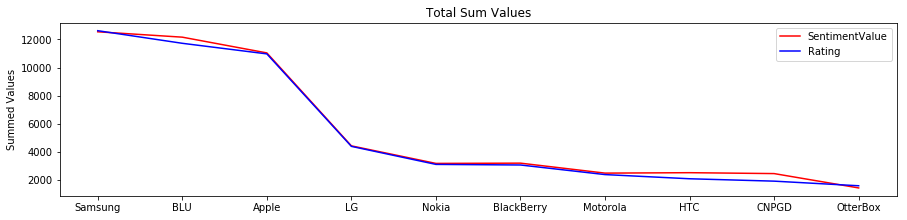

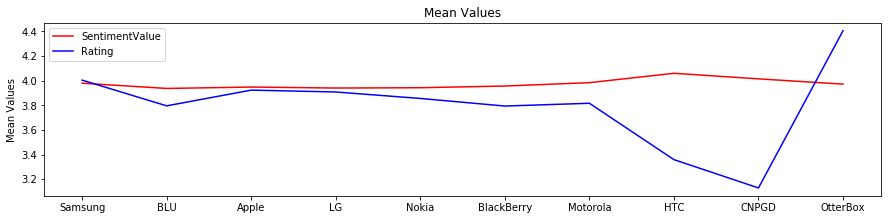

In [454]:
import pylab

names = testing2.index[:10]
y = testing2['sum', 'SENTIMENT_VALUE'][:10]
y2 = testing2['sum', 'Rating'][:10]



pylab.figure(figsize=(15,7))
x = range(10)
pylab.subplot(2,1,1)
pylab.xticks(x, names)
pylab.ylabel('Summed Values')
pylab.title('Total Sum Values')
pylab.plot(x,y,"r-",x,y2,'b-')
pylab.legend(['SentimentValue', 'Rating'])

y_new = testing2['mean', 'SENTIMENT_VALUE'][:10]
y2_new = testing2['mean', 'Rating'][:10]



pylab.figure(figsize=(15,7))


pylab.subplot(2,1,2)
pylab.xticks(x, names)
pylab.ylabel('Mean Values')
pylab.title('Mean Values')
pylab.plot(x,y_new,"r-",x,y2_new,'b-')
pylab.legend(['SentimentValue', 'Rating'])


pylab.show()

### Sentiment Analysis For Top 5 brands

In [546]:
samsung = []
blu = []
apple = []
lg = []
nokia = []



for i in range(0,20000):
    score = all_sent_values[i]
    brand = temp_data['Brand Name'][i]
    if (brand == 'Samsung'):
        samsung.append(score)
    elif (brand == 'BLU'):
        blu.append(score)
    elif (brand == 'Apple'):
        apple.append(score)
    elif (brand == 'LG'):
        lg.append(score)
    elif (brand == 'Nokia'):
        nokia.append(score)
    else:
        continue

In [550]:
list_of_brands = [samsung, blu, apple,lg,nokia]
name_of_brands = ['Samsung', 'BLU', 'Apple', 'LG', 'Nokia']

In [722]:
def plot_brand(brand, name):
    pylab.figure(figsize=(20,3))
    x = range(0,800)
    
    #pylab.xticks(x)
    pylab.ylabel('Sentiment')
    pylab.title(name)
    #pylab.plot(x,brand,"ro", alpha = 0.2)
    pylab.plot(x, brand[:800], color='#4A148C', linestyle='none', marker='o',ms=9, alpha = 0.4)
    
    pylab.show()

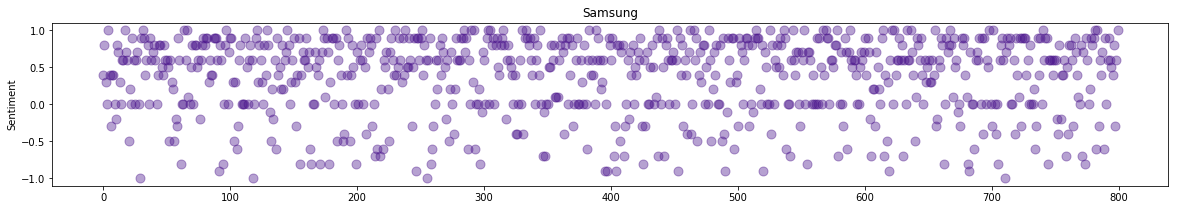

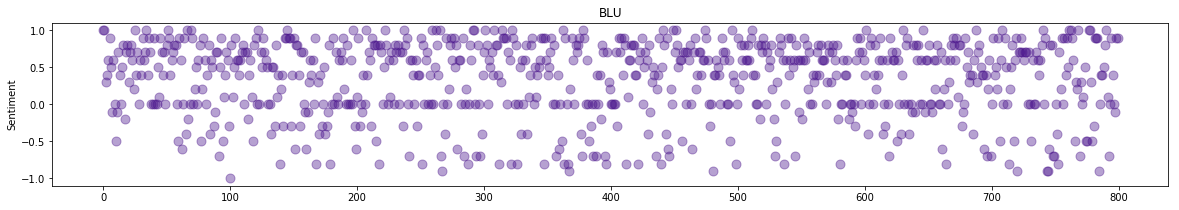

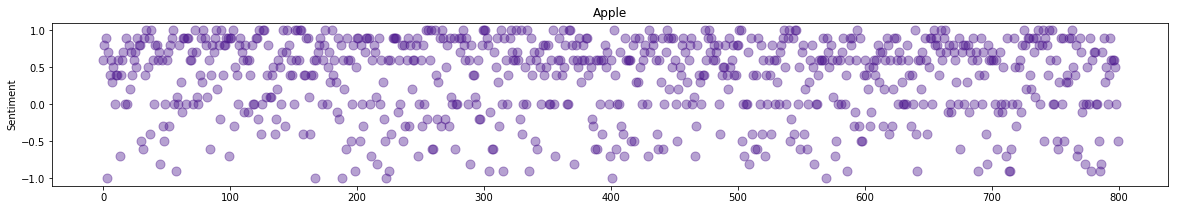

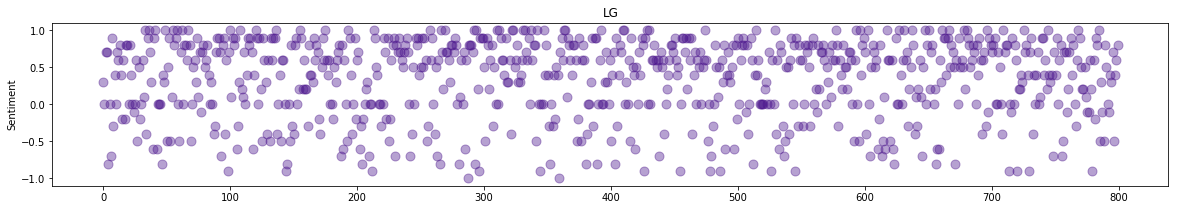

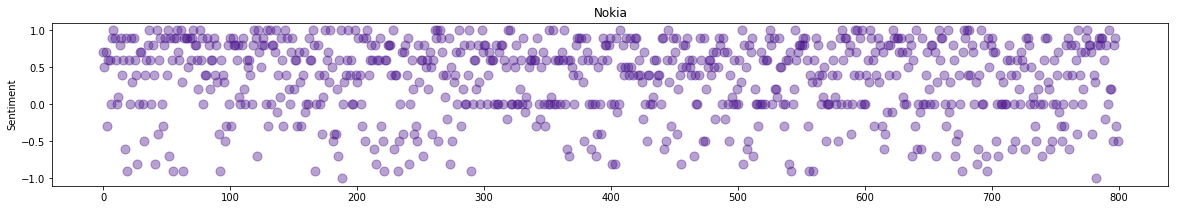

In [723]:
for i in range(0,len(list_of_brands)):
    plot_brand(list_of_brands[i],name_of_brands[i])

## Observation : 
#### 1. Sentiment concentration towards positivity decreases as we move from top to lower brands.
#### 2. Population towards negativity and neutrality keeps on increasing as we move downwards.